In [108]:
## Predict probability of Property fair visitors booking a property
## buisness understanding....
#There are quiet parameters(Questiosn asked) based on that its decided whether a person will buy a poperty or not......
import pandas as pd
import statistics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chisquare
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
sns.set(style="ticks", color_codes=True)


In [109]:
PropertyCsv=pd.read_csv('D:\DataScience-Task\Predictive Modeling.csv')
PropertyCsv.head()
PropertyCsv1=PropertyCsv

In [110]:
## Lets perform some EDA on data..
PropertyCsv.info()
## no misisngvalues in data.. Mostly categorical varibales.. the target varibale is ## Target_Variable_Convert 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 16 columns):
VisitorID                      120000 non-null int64
Proj_Group                     120000 non-null object
Proj_Segment                   120000 non-null object
Proj_Type                      120000 non-null object
Visitor_Group                  120000 non-null object
Visitor_Gender                 120000 non-null object
Question_Age                   120000 non-null object
Question_Budget                120000 non-null object
Question_HHIncome              120000 non-null object
Question_InstallmentMonthly    120000 non-null object
Question_MarriageStatus        120000 non-null object
Question_Nationality           120000 non-null object
Question_Occupation            120000 non-null object
Question_P_Income              120000 non-null object
Question_TimeToMoveIn          120000 non-null object
Target_Variable_Convert        120000 non-null bool
dtypes: bool(1), int64(1), o

In [111]:
PropertyCsv.shape

(120000, 16)

In [112]:
#categorical columns
CL_CATEGORICAL_COLUMNS=PropertyCsv.select_dtypes(exclude=['int', 'float','int64']).columns
CL_CATEGORICAL_COLUMNS

Index(['Proj_Group', 'Proj_Segment', 'Proj_Type', 'Visitor_Group',
       'Visitor_Gender', 'Question_Age', 'Question_Budget',
       'Question_HHIncome', 'Question_InstallmentMonthly',
       'Question_MarriageStatus', 'Question_Nationality',
       'Question_Occupation', 'Question_P_Income', 'Question_TimeToMoveIn',
       'Target_Variable_Convert'],
      dtype='object')

In [113]:
for i in range(len(CL_CATEGORICAL_COLUMNS)):
    print("Unique Values of ",CL_CATEGORICAL_COLUMNS[i],len(pd.value_counts(PropertyCsv[CL_CATEGORICAL_COLUMNS[i]])))

Unique Values of  Proj_Group 5
Unique Values of  Proj_Segment 5
Unique Values of  Proj_Type 2
Unique Values of  Visitor_Group 6
Unique Values of  Visitor_Gender 3
Unique Values of  Question_Age 8
Unique Values of  Question_Budget 38
Unique Values of  Question_HHIncome 79848
Unique Values of  Question_InstallmentMonthly 32120
Unique Values of  Question_MarriageStatus 4
Unique Values of  Question_Nationality 3
Unique Values of  Question_Occupation 5
Unique Values of  Question_P_Income 13
Unique Values of  Question_TimeToMoveIn 6
Unique Values of  Target_Variable_Convert 2


In [114]:
### Few columns are categorical that should be numerical.. Hense lets perform some EDA on it. Like AGE, Income, installment monthly
# budget,, P_income, Time to move in..

## EDA on age.. ## Convert into upper and lower bound and find the mean value..
PropertyCsv1[["LowerAgeBound","UpperAgeBound"]]= PropertyCsv1["Question_Age"].str.split("-", n = 1, expand = True)

In [115]:
## for columns having age >51 lets keep upper bound as 75(now a days expenctancy of people).. for ag egroup <25.. generally people
# intrested in buying flats are 24-25 hense lets keep lower bound as 25
PropertyCsv1.loc[PropertyCsv1['LowerAgeBound'].str.contains('51'), 'UpperAgeBound'] = "75"
PropertyCsv1.loc[PropertyCsv1['LowerAgeBound'].str.contains('25'), 'UpperAgeBound'] = "25"

In [116]:
### Lets remove +sign from age as we hv converted it to lower and upper bounds..
PropertyCsv1['LowerAgeBound']=PropertyCsv1['LowerAgeBound'].str.replace('+', '')
# df.replace('\*','',regex=True
#PropertyCsv1['LowerAgeBound']


In [117]:
## Age will ahve Not answers when the data might be misisng.. hense lets fill up with mean value of age column..
PropertyCsv1['LowerAgeBound']=PropertyCsv1['LowerAgeBound'].str.replace('Not Answer', 'NA')
PropertyCsv1.UpperAgeBound=PropertyCsv1.UpperAgeBound.replace({'None':np.nan})

In [118]:
#PropertyCsv1['LowerAgeBound'].fillna(pd.to_numeric(PropertyCsv1['LowerAgeBound']).mean())
PropertyCsv1['LowerAgeBound'] = PropertyCsv1['LowerAgeBound'].apply(pd.to_numeric, errors='coerce')
PropertyCsv1['LowerAgeBound'].fillna(pd.to_numeric(PropertyCsv1['LowerAgeBound']).mean(),inplace=True)
# pd.to_numeric

In [119]:
PropertyCsv1['UpperAgeBound'] = PropertyCsv1['UpperAgeBound'].apply(pd.to_numeric, errors='coerce')
PropertyCsv1['UpperAgeBound'].fillna(pd.to_numeric(PropertyCsv1['UpperAgeBound']).mean(),inplace=True)
# df.fillna(method='bfill', inplace=True)

In [120]:
#import math
PropertyCsv1['Question_Age']=PropertyCsv1[['UpperAgeBound','LowerAgeBound']].mean(axis=1)
PropertyCsv1['Question_Age']=PropertyCsv1['Question_Age'].astype(np.int64)

In [121]:
PropertyCsv=PropertyCsv1.drop(['UpperAgeBound','LowerAgeBound'],axis=1)
PropertyCsv['Question_Age']=PropertyCsv1['Question_Age']


In [122]:
## Question_Budget should be converted to numeric...
PropertyCsv1['Question_Budget']=PropertyCsv1['Question_Budget'].str.replace('Not Answer', 'NA')
PropertyCsv1['Question_Budget']=PropertyCsv1['Question_Budget'].apply(pd.to_numeric, errors='coerce')
PropertyCsv1['Question_Budget'].fillna(pd.to_numeric(PropertyCsv1['Question_Budget']).mean(),inplace=True)
PropertyCsv1['Question_Budget']=round(PropertyCsv1['Question_Budget'],2)
PropertyCsv['Question_Budget']=PropertyCsv1['Question_Budget']

In [123]:
## Question_HHIncome should be converted to numeric...
PropertyCsv1['Question_HHIncome']=PropertyCsv1['Question_HHIncome'].apply(pd.to_numeric, errors='coerce')
PropertyCsv1['Question_HHIncome'].fillna(pd.to_numeric(PropertyCsv1['Question_HHIncome']).mean(),inplace=True)
PropertyCsv1['Question_HHIncome']=round(PropertyCsv1['Question_HHIncome'],2)
PropertyCsv['Question_HHIncome']=PropertyCsv1['Question_HHIncome']


In [124]:
## Question_InstallmentMonthly should be converted to numeric.. ##3 the value as cash is filled by the eman values
PropertyCsv1['Question_InstallmentMonthly']=PropertyCsv1['Question_InstallmentMonthly'].str.replace('cash', 'NA')
PropertyCsv1['Question_InstallmentMonthly']=PropertyCsv1['Question_InstallmentMonthly'].apply(pd.to_numeric, errors='coerce')
PropertyCsv1['Question_InstallmentMonthly'].fillna(pd.to_numeric(PropertyCsv1['Question_InstallmentMonthly']).mean(),inplace=True)
PropertyCsv1['Question_InstallmentMonthly']=round(PropertyCsv1['Question_InstallmentMonthly'],2)
PropertyCsv['Question_InstallmentMonthly']=PropertyCsv1['Question_InstallmentMonthly']

In [125]:
# Question_P_Income
PropertyCsv1['Question_P_Income']=PropertyCsv1['Question_P_Income'].str.replace('Not Answer', 'NA')
PropertyCsv1['Question_P_Income']=PropertyCsv1['Question_P_Income'].apply(pd.to_numeric, errors='coerce')
PropertyCsv1['Question_P_Income'].fillna(pd.to_numeric(PropertyCsv1['Question_P_Income']).mean(),inplace=True)
PropertyCsv1['Question_P_Income']=round(PropertyCsv1['Question_P_Income'],2)
PropertyCsv['Question_P_Income']=PropertyCsv1['Question_P_Income']

In [126]:
PropertyCsv1['Question_TimeToMoveIn']=PropertyCsv1['Question_TimeToMoveIn'].str.replace('Not Answer', 'NA')
PropertyCsv1['Question_TimeToMoveIn']=PropertyCsv1['Question_TimeToMoveIn'].apply(pd.to_numeric, errors='coerce')
PropertyCsv1['Question_TimeToMoveIn'].fillna(pd.to_numeric(PropertyCsv1['Question_TimeToMoveIn']).mean(),inplace=True)
PropertyCsv1['Question_TimeToMoveIn']=round(PropertyCsv1['Question_TimeToMoveIn'],1)
PropertyCsv['Question_TimeToMoveIn']=PropertyCsv1['Question_TimeToMoveIn']

In [127]:
PropertyCsv.head()

,VisitorID,Proj_Group,Proj_Segment,Proj_Type,Visitor_Group,Visitor_Gender,Question_Age,Question_Budget,Question_HHIncome,Question_InstallmentMonthly,Question_MarriageStatus,Question_Nationality,Question_Occupation,Question_P_Income,Question_TimeToMoveIn,Target_Variable_Convert
0,1,Outer,B,Standard Units,Central,F,63,11.30,610326.00,100133.00,Single,Not Answer,Business Owner,135377.06,9.1,False
1,2,Outer,A,Standard Units,Outer,M,48,13.50,421363.00,54873.48,Married with Children,Not Answer,Other(Please specify),225000.00,9.1,False
2,3,Central,B,Premium Units,Central,F,63,11.30,285742.15,54873.48,Not Answer,India,Not Answer,135377.06,9.1,False
3,4,Urban,A,Standard Units,Central,M,63,7.71,285742.15,54873.48,Married with Children,Not Answer,Business Owner,135377.06,9.1,False
4,5,Outer,A,Standard Units,Central,M,63,28.50,588512.00,122342.00,Married with Children,Not Answer,Business Owner,135377.06,9.1,False


In [128]:
PropertyCsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 16 columns):
VisitorID                      120000 non-null int64
Proj_Group                     120000 non-null object
Proj_Segment                   120000 non-null object
Proj_Type                      120000 non-null object
Visitor_Group                  120000 non-null object
Visitor_Gender                 120000 non-null object
Question_Age                   120000 non-null int64
Question_Budget                120000 non-null float64
Question_HHIncome              120000 non-null float64
Question_InstallmentMonthly    120000 non-null float64
Question_MarriageStatus        120000 non-null object
Question_Nationality           120000 non-null object
Question_Occupation            120000 non-null object
Question_P_Income              120000 non-null float64
Question_TimeToMoveIn          120000 non-null float64
Target_Variable_Convert        120000 non-null bool
dtypes: bool(1), float64

In [129]:
### EDA on Categorical data..
## visitors group..
#Property_Visitor_Group_MaxCounts=PropertyCsv1['Visitor_Group'].value_counts().nlargest(4)
#LargeNumberReplace
#PropertyCsv1['Visitor_Group']=list(islice(cycle(Property_Visitor_Group_MaxCounts), len(PropertyCsv)))
PropertyCsv['Visitor_Group']

0            Central
1              Outer
2            Central
3            Central
4            Central
5            Central
6              Outer
7              Outer
8              Outer
9              Outer
10             Outer
11           Central
12             Outer
13           Central
14             Major
15           Central
16           Central
17             Outer
18             Outer
19             Outer
20             Outer
21             Outer
22             Outer
23             Outer
24             Outer
25           Central
26             Outer
27             Outer
28           Central
29           Central
             ...    
119970         Major
119971         Outer
119972    Not Answer
119973         Outer
119974         Outer
119975    Not Answer
119976    Not Answer
119977       Central
119978         Major
119979    Not Answer
119980    Not Answer
119981    Not Answer
119982    Not Answer
119983         Major
119984    Not Answer
119985    Not Answer
119986       

In [130]:
import random
Property_Visitor_Group_MaxCounts=PropertyCsv1['Visitor_Group'].value_counts().index[0]
# col.value_counts().index[0]
PropertyCsv1.loc[PropertyCsv1['Visitor_Group'].str.contains('Not Answer'), 'Visitor_Group'] =Property_Visitor_Group_MaxCounts
PropertyCsv['Visitor_Group']=PropertyCsv1['Visitor_Group']

In [131]:
Property_Visitor_Group_MaxCounts=PropertyCsv1['Visitor_Gender'].value_counts().index[0]
PropertyCsv1.loc[PropertyCsv1['Visitor_Gender'].str.contains('Not Answer'), 'Visitor_Gender'] = Property_Visitor_Group_MaxCounts
PropertyCsv['Visitor_Gender']=PropertyCsv1['Visitor_Gender']

In [132]:
# Question_MarriageStatus
Property_Visitor_Group_MaxCounts=PropertyCsv1['Question_MarriageStatus'].value_counts().index[0]
PropertyCsv1.loc[PropertyCsv1['Question_MarriageStatus'].str.contains('Not Answer'), 'Question_MarriageStatus'] =  Property_Visitor_Group_MaxCounts
PropertyCsv['Question_MarriageStatus']=PropertyCsv1['Question_MarriageStatus']
# list(islice(cycle(Property_Visitor_Group_MaxCounts), len(PropertyCsv1['Question_MarriageStatus']=="Not Answer")))

In [133]:
# Question_Nationality
Property_Visitor_Group_MaxCounts=PropertyCsv1['Question_Nationality'].value_counts().index[1]
PropertyCsv1.loc[PropertyCsv1['Question_Nationality'].str.contains('Not Answer'), 'Question_Nationality'] =  Property_Visitor_Group_MaxCounts
PropertyCsv['Question_Nationality']=PropertyCsv1['Question_Nationality']

In [134]:
# Question_Nationality
Property_Visitor_Group_MaxCounts=PropertyCsv1['Question_Occupation'].value_counts().index[0]
PropertyCsv1.loc[PropertyCsv1['Question_Occupation'].str.contains('Not Answer'), 'Question_Occupation'] =  Property_Visitor_Group_MaxCounts
PropertyCsv['Question_Occupation']=PropertyCsv1['Question_Occupation']

In [135]:
#pd.write_csv("D:\DataScience-Task\PropertyCsvEDA.csv")
PropertyCsv.to_csv("D:\DataScience-Task\PropertyCsvEDA.csv")

In [136]:
PropertyCsv.head()

,VisitorID,Proj_Group,Proj_Segment,Proj_Type,Visitor_Group,Visitor_Gender,Question_Age,Question_Budget,Question_HHIncome,Question_InstallmentMonthly,Question_MarriageStatus,Question_Nationality,Question_Occupation,Question_P_Income,Question_TimeToMoveIn,Target_Variable_Convert
0,1,Outer,B,Standard Units,Central,F,63,11.30,610326.00,100133.00,Single,India,Business Owner,135377.06,9.1,False
1,2,Outer,A,Standard Units,Outer,M,48,13.50,421363.00,54873.48,Married with Children,India,Other(Please specify),225000.00,9.1,False
2,3,Central,B,Premium Units,Central,F,63,11.30,285742.15,54873.48,Single,India,Business Owner,135377.06,9.1,False
3,4,Urban,A,Standard Units,Central,M,63,7.71,285742.15,54873.48,Married with Children,India,Business Owner,135377.06,9.1,False
4,5,Outer,A,Standard Units,Central,M,63,28.50,588512.00,122342.00,Married with Children,India,Business Owner,135377.06,9.1,False


In [137]:
PropertyCsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 16 columns):
VisitorID                      120000 non-null int64
Proj_Group                     120000 non-null object
Proj_Segment                   120000 non-null object
Proj_Type                      120000 non-null object
Visitor_Group                  120000 non-null object
Visitor_Gender                 120000 non-null object
Question_Age                   120000 non-null int64
Question_Budget                120000 non-null float64
Question_HHIncome              120000 non-null float64
Question_InstallmentMonthly    120000 non-null float64
Question_MarriageStatus        120000 non-null object
Question_Nationality           120000 non-null object
Question_Occupation            120000 non-null object
Question_P_Income              120000 non-null float64
Question_TimeToMoveIn          120000 non-null float64
Target_Variable_Convert        120000 non-null bool
dtypes: bool(1), float64

In [138]:
## Lets vusialize the distribution of Data..

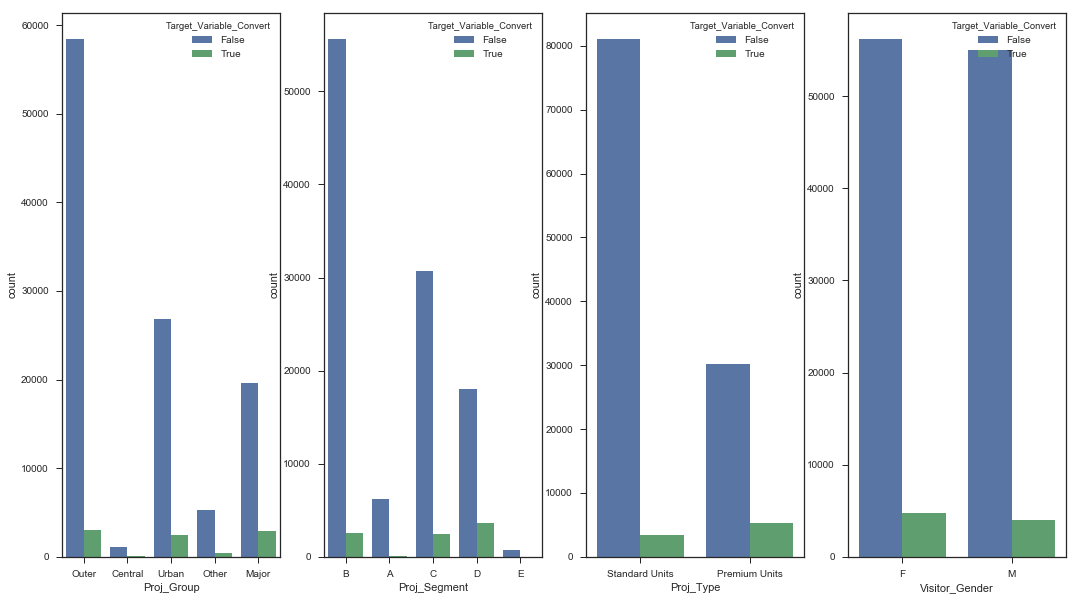

In [139]:
fig, ax =plt.subplots(1,4,figsize=(18,10))
sns.countplot(x="Proj_Group", hue="Target_Variable_Convert", data=PropertyCsv,ax=ax[0])
sns.countplot(x="Proj_Segment", hue="Target_Variable_Convert", data=PropertyCsv,ax=ax[1])
sns.countplot(x="Proj_Type", hue="Target_Variable_Convert", data=PropertyCsv,ax=ax[2])
sns.countplot(x="Visitor_Gender", hue="Target_Variable_Convert", data=PropertyCsv,ax=ax[3])
## Most of the project built in outer region, urban and major region is converted into a deal..
#Project in sagmnet #B,C,D are converted ..Mostly females have made a deal and mor epremium units are sold.

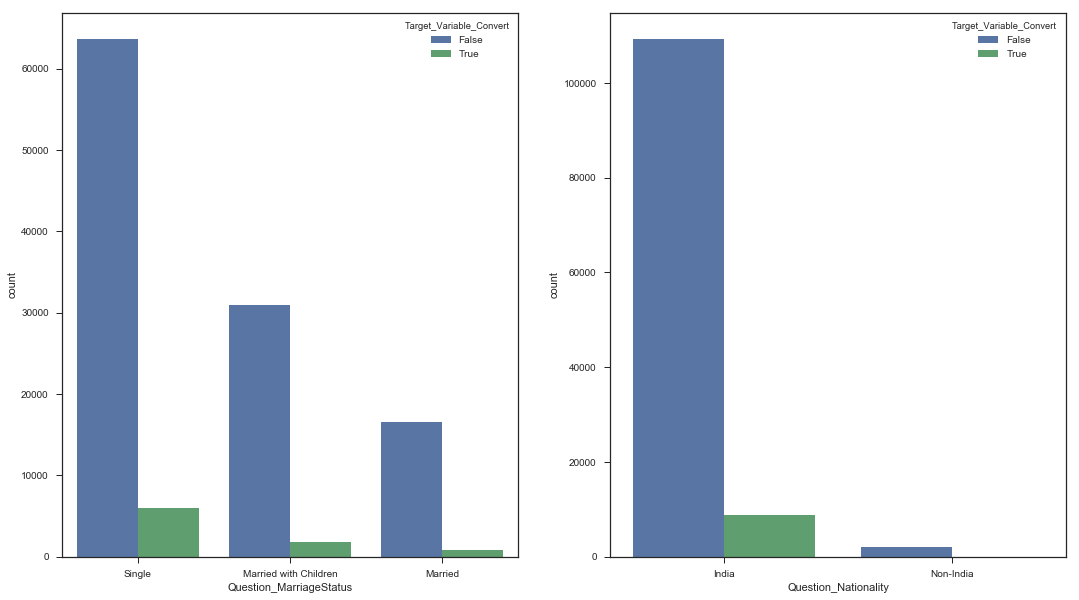

In [140]:
fig, ax =plt.subplots(1,2,figsize=(18,10))
sns.countplot(x="Question_MarriageStatus", hue="Target_Variable_Convert", data=PropertyCsv,ax=ax[0])
sns.countplot(x="Question_Nationality", hue="Target_Variable_Convert", data=PropertyCsv,ax=ax[1])
## Mostly Single and indians have made the deal

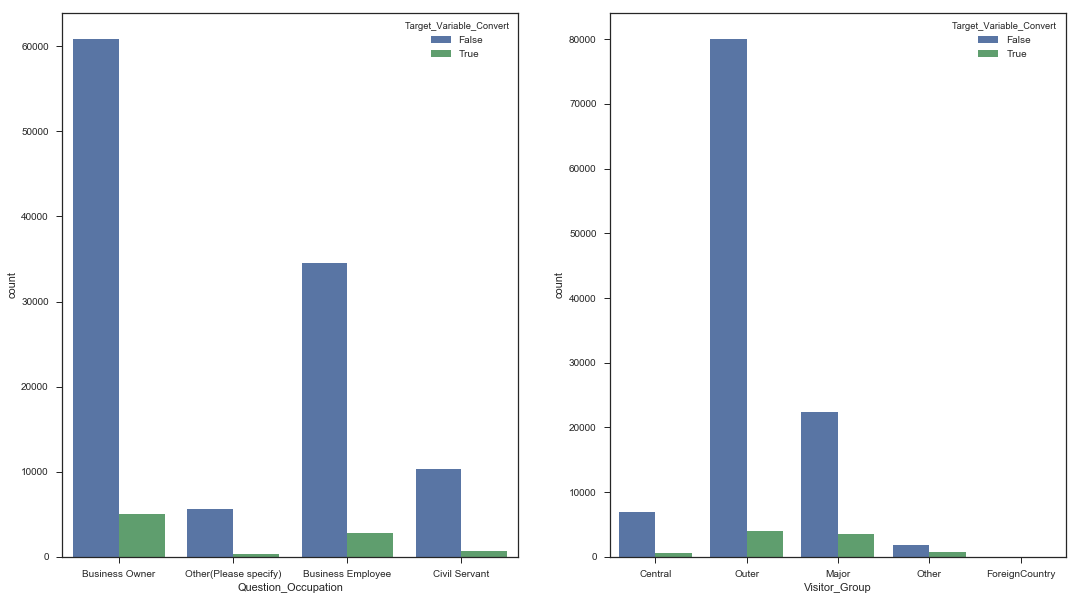

In [141]:
fig, ax =plt.subplots(1,2,figsize=(18,10))
sns.countplot(x="Question_Occupation", hue="Target_Variable_Convert", data=PropertyCsv,ax=ax[0])
sns.countplot(x="Visitor_Group", hue="Target_Variable_Convert", data=PropertyCsv,ax=ax[1])
## Mostly buisness owner and buisness employee have cracked the deal and mostly visitor group is from MAjor and outer regions 

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\envs\newenvt\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


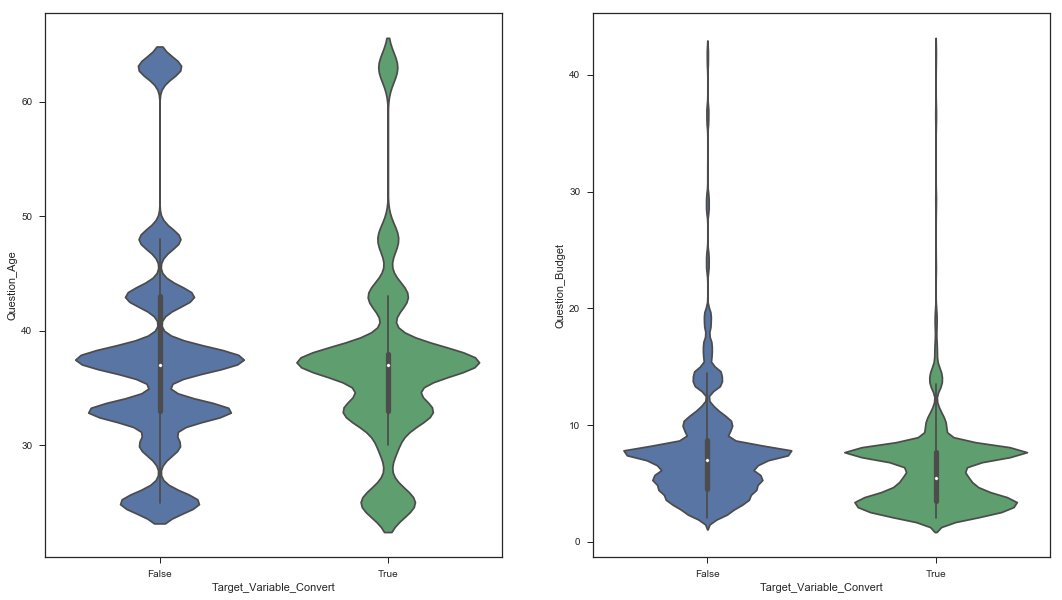

In [142]:
fig, ax =plt.subplots(1,2,figsize=(18,10))
sns.violinplot(x='Target_Variable_Convert', y='Question_Age', data=PropertyCsv,ax=ax[0])
sns.violinplot(x='Target_Variable_Convert', y='Question_Budget', data=PropertyCsv,ax=ax[1])
## Most people b/w age 35-40 have converted and with a budget of 0-20

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\envs\newenvt\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


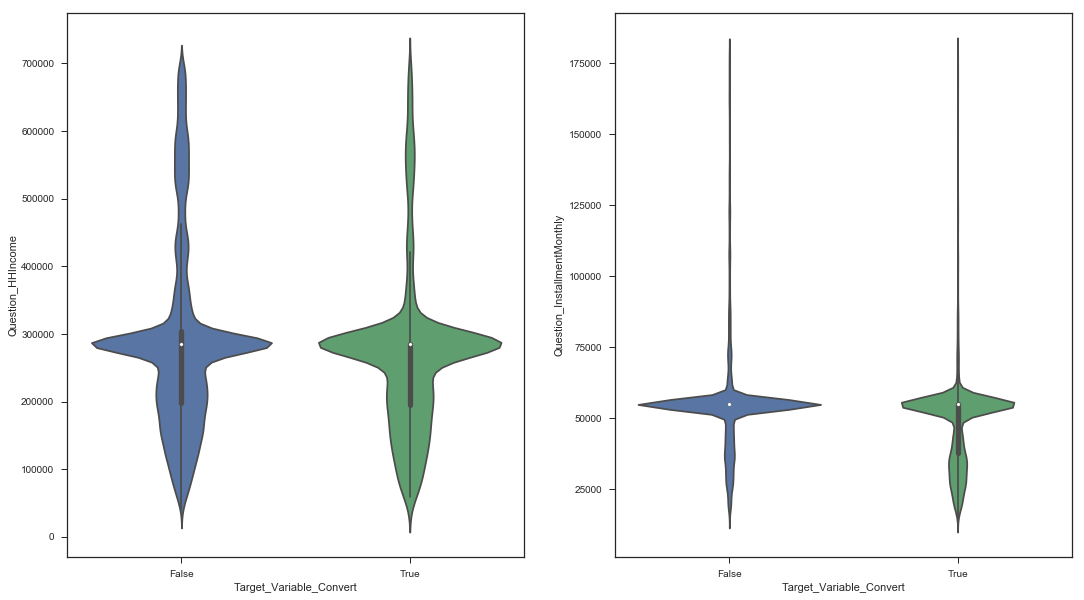

In [143]:
fig, ax =plt.subplots(1,2,figsize=(18,10))
sns.violinplot(x='Target_Variable_Convert', y='Question_HHIncome', data=PropertyCsv,ax=ax[0])
sns.violinplot(x='Target_Variable_Convert', y='Question_InstallmentMonthly', data=PropertyCsv,ax=ax[1])
## mostly people with Monthly income of 2-3 lakhs have bought he property and are paying monthly installment of 50-55 k.

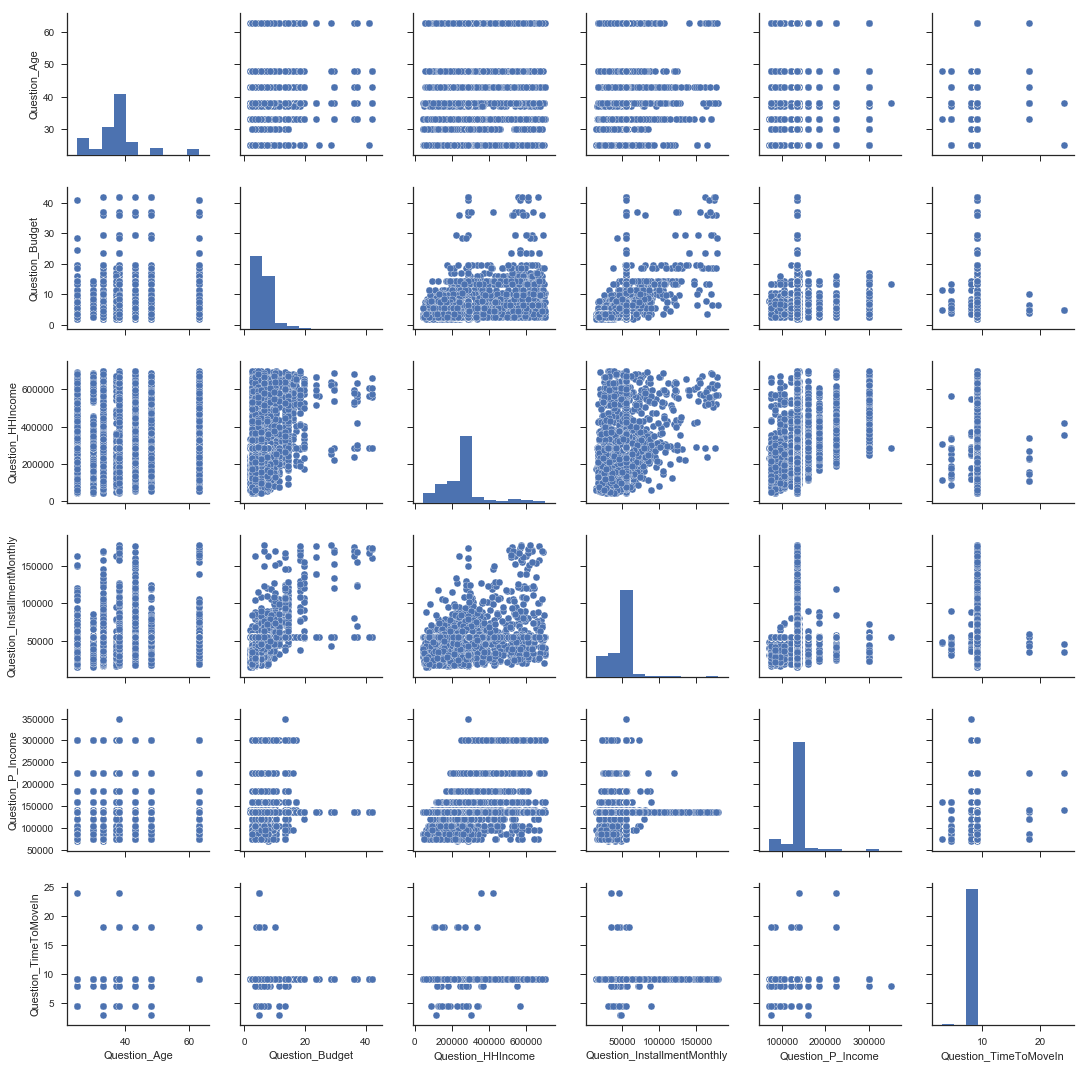

In [144]:
PropertyCsv1=PropertyCsv[PropertyCsv['Target_Variable_Convert']==True].drop(['Target_Variable_Convert','VisitorID'],axis=1)
sns.pairplot(PropertyCsv1)
## Insights..

In [145]:
PropertyCsv1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8755 entries, 12 to 119998
Data columns (total 14 columns):
Proj_Group                     8755 non-null object
Proj_Segment                   8755 non-null object
Proj_Type                      8755 non-null object
Visitor_Group                  8755 non-null object
Visitor_Gender                 8755 non-null object
Question_Age                   8755 non-null int64
Question_Budget                8755 non-null float64
Question_HHIncome              8755 non-null float64
Question_InstallmentMonthly    8755 non-null float64
Question_MarriageStatus        8755 non-null object
Question_Nationality           8755 non-null object
Question_Occupation            8755 non-null object
Question_P_Income              8755 non-null float64
Question_TimeToMoveIn          8755 non-null float64
dtypes: float64(5), int64(1), object(8)
memory usage: 1.3+ MB


In [146]:
## Corelation among predictors..
CL_CONTINUOS_COLUMNS=PropertyCsv._get_numeric_data().columns
PropertyCsv[CL_CONTINUOS_COLUMNS].corr()
## finding corelation among variables.. # insights...
#PropertyCsv1[CL_CONTINUOS_COLUMNS].corr()
## Not much corelation found among continous predictors... hense not rmeoving any predictor based on corelation...

,VisitorID,Question_Age,Question_Budget,Question_HHIncome,Question_InstallmentMonthly,Question_P_Income,Question_TimeToMoveIn,Target_Variable_Convert
VisitorID,1.000000,-0.017538,0.013169,-0.074092,-0.000251,0.012576,0.001978,0.011368
Question_Age,-0.017538,1.000000,0.162586,0.148855,0.108530,0.135459,0.010423,-0.020247
Question_Budget,0.013169,0.162586,1.000000,0.450012,0.553314,0.177955,-0.002655,-0.099404
Question_HHIncome,-0.074092,0.148855,0.450012,1.000000,0.324926,0.311454,0.005485,-0.041652
Question_InstallmentMonthly,-0.000251,0.108530,0.553314,0.324926,1.000000,0.043247,-0.003268,-0.089875
Question_P_Income,0.012576,0.135459,0.177955,0.311454,0.043247,1.000000,0.005320,-0.004180
Question_TimeToMoveIn,0.001978,0.010423,-0.002655,0.005485,-0.003268,0.005320,1.000000,-0.001589
Target_Variable_Convert,0.011368,-0.020247,-0.099404,-0.041652,-0.089875,-0.004180,-0.001589,1.000000


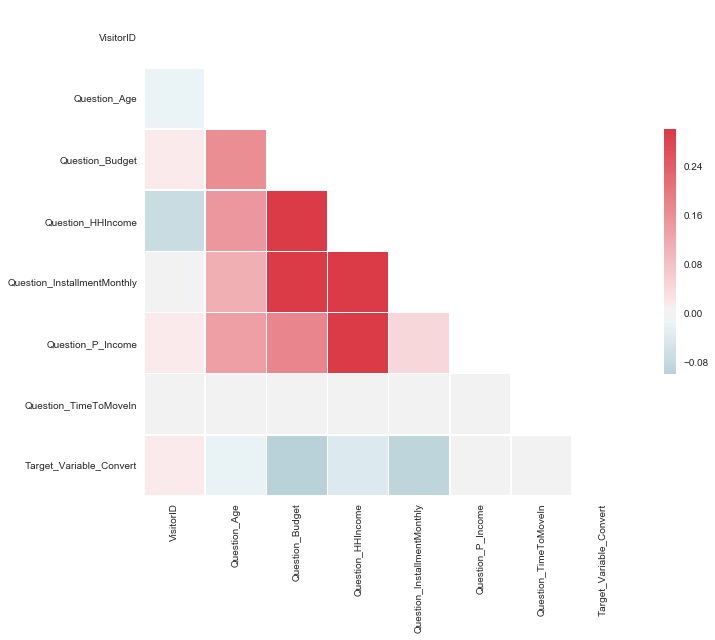

In [147]:
sns.set(style="white")

# Compute the correlation matrix
corr = PropertyCsv[CL_CONTINUOS_COLUMNS].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [148]:
CL_CATEGORICAL_COLUMNS=PropertyCsv.select_dtypes(exclude=['int', 'float','int64']).columns
PropertyCsv2=PropertyCsv[CL_CATEGORICAL_COLUMNS].drop('Target_Variable_Convert',axis=1)
PropertyCsv2.head()
#correlation_matrix = np.corrcoef(PropertyCsv2.T)
#print(correlation_matrix)
# PropertyCsvDs.drop('Target_Variable_Convert',axis=1)
## not much corelation found under same..

,Proj_Group,Proj_Segment,Proj_Type,Visitor_Group,Visitor_Gender,Question_MarriageStatus,Question_Nationality,Question_Occupation
0,Outer,B,Standard Units,Central,F,Single,India,Business Owner
1,Outer,A,Standard Units,Outer,M,Married with Children,India,Other(Please specify)
2,Central,B,Premium Units,Central,F,Single,India,Business Owner
3,Urban,A,Standard Units,Central,M,Married with Children,India,Business Owner
4,Outer,A,Standard Units,Central,M,Married with Children,India,Business Owner


# plot the heatmap
sns.heatmap(correlation_matrix, 
        xticklabels=corr.columns,
      yticklabels=corr.columns)

In [149]:
## Lets convert the categorical into dummy variables...
PropertyCsvDs=pd.get_dummies(PropertyCsv,drop_first=True)
PropertyCsvDs.head()
PropertyCsvDs['Target_Variable_Convert']=PropertyCsvDs['Target_Variable_Convert'].astype(int)

In [161]:
### Lets start modleing into the dataset.. PropertyCsv ## Apply classification Modle to teh dataset..
### Logistic regerssion...

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC
from sklearn import svm

In [218]:
X_train, X_test, y_train, y_test = train_test_split(PropertyCsvDs.drop('Target_Variable_Convert',axis=1), PropertyCsv[['Target_Variable_Convert']], test_size=0.3)

In [99]:
lr = LogisticRegression().fit(X_train, y_train).predict(X_test)

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\envs\newenvt\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [100]:
print("Accuracy Score for LogisticRegression model is",accuracy_score(y_test,lr))
print("Area Under Curve for LogisticRegression model is",roc_auc_score(y_test,lr))

Accuracy Score for LogisticRegression model is 0.9274444444444444
Area Under Curve for LogisticRegression model is 0.5


In [101]:
clf=LogisticRegression().fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\envs\newenvt\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9274444444444444

In [102]:
### Naive byess...
gnb = GaussianNB().fit(X_train, y_train).predict(X_test)
print("Accuracy Score for Naive_Bayes model is",accuracy_score(y_test,gnb))
print("Area Under Curve for Naive_Bayes model is",roc_auc_score(y_test,gnb))

roc_auc_score

Accuracy Score for Naive_Bayes model is 0.9274444444444444
Area Under Curve for Naive_Bayes model is 0.5


C:\Users\sbha69\AppData\Local\Continuum\anaconda3\envs\newenvt\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<function sklearn.metrics.ranking.roc_auc_score(y_true, y_score, average='macro', sample_weight=None)>

In [103]:
## Import the random forest model.
from sklearn.ensemble import RandomForestClassifier 
## This line instantiates the model. 
rf = RandomForestClassifier() 
## Fit the model on your training data.
rf.fit(X_train, y_train) 
## And score it on your testing data.
rf.score(X_test, y_test)

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\envs\newenvt\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9405555555555556

In [104]:
classifier= KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train).predict(X_test)
print("Accuracy Score for KNeighbors Classifier model is",accuracy_score(y_test,classifier))
print("Area Under Curve for KNeighbors Classifier model is",roc_auc_score(y_test,classifier))

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\envs\newenvt\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


Accuracy Score for KNeighbors Classifier model is 0.9241388888888888
Area Under Curve for KNeighbors Classifier model is 0.5956176357756433


In [105]:
#### Deciison tree...
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier().fit(X_train, y_train).predict(X_test)
print("Accuracy Score for Decision Tree Classifier  model is",accuracy_score(y_test,dt))
print("Area Under Curve for Decision Tree Classifier model is",roc_auc_score(y_test,dt))

Accuracy Score for Decision Tree Classifier  model is 0.9105
Area Under Curve for Decision Tree Classifier model is 0.6868995490580746


In [106]:
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBClassifier
xgb = XGBClassifier().fit(X_train, y_train).predict(X_test)
print("Accuracy Score for XG Boost  model is",accuracy_score(y_test,xgb))
print("Area Under Curve for XG Boost  model is",roc_auc_score(y_test,xgb))

ImportError: No module named 'xgboost'

In [ ]:
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},
{
    'label': 'GaussianNB',
    'model': GaussianNB(),
},

{
    'label': 'RandomForestClassifier',
    'model': RandomForestClassifier(),
},
{
    'label': 'KNeighborsClassifier',
    'model': KNeighborsClassifier(),
},
{
    'label': 'XGBoost',
    'model': XGBClassifier(),
}
,
#{# According to sklearn documentation , the method 'predict_proba' is not defined for 'LinearSVC'
 #   'label': 'LinearSVC(C=1.0)',
  #  'model': LinearSVC(C=1.0),
#}
 #,
{
    'label': 'DecisionTreeClassifier()',
    'model': DecisionTreeClassifier(),
}
]

In [ ]:
fig_size = plt.rcParams["figure.figsize"] 
print(fig_size)
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

In [ ]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:grey')

In [ ]:

for m in models:
    model = m['model'] # select the model
    model.fit(x_train, y_train) # train the model
    y_pred=model.predict(x_test) # predict the test data
    #accuracy_score=accuracy_score(y_test,y_pred)
    #print(accuracy_score,"model",model)
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
    # Calculate Area under the curve to display on the plot
    auc = sklearn.metrics.roc_auc_score(y_test,model.predict(x_test))
    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.4f)' % (m['label'], auc))
    #plt.plot(label= (m['label'], accuracy_score))

    # Custom settings for the plot 

    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
#    plt.title('Receiver Operating Characteristic for (State= %0.1f))'%x)
    plt.legend(loc="lower right")
plt.show()  

In [ ]:
# TENSORFLOW..
!pip3 install --upgrade tensorflow
import tensorflow as tf

In [414]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(PropertyCsv, PropertyCsv[['Target_Variable_Convert']], test_size=0.3)

In [415]:
## Get continous and categorical features...
CL_CONTINUOS_COLUMNS=PropertyCsv._get_numeric_data().columns
CL_CONTINUOS_COLUMNS

Index(['VisitorID', 'Question_Age', 'Question_Budget', 'Question_HHIncome',
       'Question_InstallmentMonthly', 'Question_P_Income',
       'Question_TimeToMoveIn', 'Target_Variable_Convert'],
      dtype='object')

In [416]:
CL_CATEGORICAL_COLUMNS=PropertyCsv.select_dtypes(exclude=['int', 'float','int64']).columns
CL_CATEGORICAL_COLUMNS=CL_CATEGORICAL_COLUMNS1[:-1]

In [417]:
continuous_features = [tf.feature_column.numeric_column(k) for k in CL_CONTINUOS_COLUMNS]	
continuous_features

[_NumericColumn(key='VisitorID', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Question_Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Question_Budget', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Question_HHIncome', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Question_InstallmentMonthly', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Question_P_Income', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Question_TimeToMoveIn', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Target_Variable_Convert', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [418]:
#If the vocabulary list of a feature is known and does not have plenty of values, it is possible to create the categorical column with categorical_column_with_vocabulary_list. It will assign to all unique vocabulary list an ID.
categorical_features = [tf.feature_column.categorical_column_with_hash_bucket(k, hash_bucket_size=1000) for k in CL_CATEGORICAL_COLUMNS]
categorical_features

[_HashedCategoricalColumn(key='Proj_Group', hash_bucket_size=1000, dtype=tf.string),
 _HashedCategoricalColumn(key='Proj_Segment', hash_bucket_size=1000, dtype=tf.string),
 _HashedCategoricalColumn(key='Proj_Type', hash_bucket_size=1000, dtype=tf.string),
 _HashedCategoricalColumn(key='Visitor_Group', hash_bucket_size=1000, dtype=tf.string),
 _HashedCategoricalColumn(key='Visitor_Gender', hash_bucket_size=1000, dtype=tf.string),
 _HashedCategoricalColumn(key='Question_MarriageStatus', hash_bucket_size=1000, dtype=tf.string),
 _HashedCategoricalColumn(key='Question_Nationality', hash_bucket_size=1000, dtype=tf.string),
 _HashedCategoricalColumn(key='Question_Occupation', hash_bucket_size=1000, dtype=tf.string)]

In [435]:
# The model will compute the weights of the columns contained in continuous_features and categorical_features.
model = tf.estimator.LinearClassifier(
    n_classes = 2,
    model_dir="ongoing/train", 
    feature_columns=categorical_features+ continuous_features,
    optimizer=tf.train.FtrlOptimizer(learning_rate=0.01))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_steps': None, '_train_distribute': None, '_num_worker_replicas': 1, '_is_chief': True, '_log_step_count_steps': 100, '_tf_random_seed': None, '_eval_distribute': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_task_id': 0, '_global_id_in_cluster': 0, '_device_fn': None, '_evaluation_master': '', '_save_summary_steps': 100, '_service': None, '_model_dir': 'ongoing/train', '_experimental_distribute': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000000003D9DC5F8>, '_protocol': None, '_task_type': 'worker', '_save_checkpoints_secs': 600, '_keep_checkpoint_every_n_hours': 10000, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_master': ''}


In [436]:
def get_input_fn(data_set, num_epochs=None, n_batch = 128, shuffle=True):
    return tf.estimator.inputs.pandas_input_fn(
       x=pd.DataFrame({k: data_set[k].values for k in data_set.columns}),
       y = pd.Series(data_set[LABEL].values),
       batch_size=n_batch,   
       num_epochs=num_epochs,
       shuffle=shuffle)

In [437]:
model.train(input_fn=get_input_fn(X_train1, 
                                      num_epochs=None,
                                      n_batch = 128,
                                      shuffle=False),
                                      steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ongoing/train\model.ckpt-13938
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 13938 into ongoing/train\model.ckpt.
INFO:tensorflow:loss = 2761.7183, step = 13939
INFO:tensorflow:global_step/sec: 155.754
INFO:tensorflow:loss = 112.51344, step = 14039 (0.645 sec)
INFO:tensorflow:global_step/sec: 249.362
INFO:tensorflow:loss = 103.581436, step = 14139 (0.400 sec)
INFO:tensorflow:global_step/sec: 232.545
INFO:tensorflow:loss = 412.70142, step = 14239 (0.433 sec)
INFO:tensorflow:global_step/sec: 218.806
INFO:tensorflow:loss = 128.9768, step = 14339 (0.459 sec)
INFO:tensorflow:global_step/sec: 219.286
INFO:tensorflow:loss = 469.22397, step = 14439 (0.452 sec)
INFO:tensorflow:global_step/sec: 202.828
INFO:tensorflow:loss = 140

In [438]:
model.evaluate(input_fn=get_input_fn(X_train1, 
                                      num_epochs=1,
                                      n_batch = 128,
                                      shuffle=False),
                                      steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-02-21-06:25:41
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ongoing/train\model.ckpt-14938
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Finished evaluation at 2019-02-21-06:25:45
INFO:tensorflow:Saving dict for global step 14938: accuracy = 0.9326071, accuracy_baseline = 0.9275357, auc = 0.8763326, auc_precision_recall = 0.5274681, average_loss = 0.20846473, global_step = 14938, label/mean = 0.07246429, loss = 26.653025, precision = 0.8622449, prediction/mean = 0.030260326, recall = 0.08329226
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 149

{'accuracy': 0.9326071,
 'accuracy_baseline': 0.9275357,
 'auc': 0.8763326,
 'auc_precision_recall': 0.5274681,
 'average_loss': 0.20846473,
 'global_step': 14938,
 'label/mean': 0.07246429,
 'loss': 26.653025,
 'precision': 0.8622449,
 'prediction/mean': 0.030260326,
 'recall': 0.08329226}

In [475]:
##Lets find the corelation among variable
## loss 4592
##3 Predict for test data
pred_input_func= tf.estimator.inputs.pandas_input_fn(x=X_test1, batch_size=10, num_epochs=1, shuffle=False)
predicted=model.predict(pred_input_func)
predicted

<generator object Estimator.predict at 0x000000003D77FF68>

In [477]:
#predicted['Target_Variable_Convert']
y_pred= [d['logits'] for d in predicted]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ongoing/train\model.ckpt-14938
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [482]:
#y_pred= [d['logits'] for d in predicted]
from sklearn import metrics
from sklearn.metrics import mean_squared_error
fpr, tpr, thresholds = metrics.roc_curve(y_test1, y_pred)
roc_auc = metrics.auc(fpr, tpr)
mean_squared_error(y_test1, y_pred)

36.57006

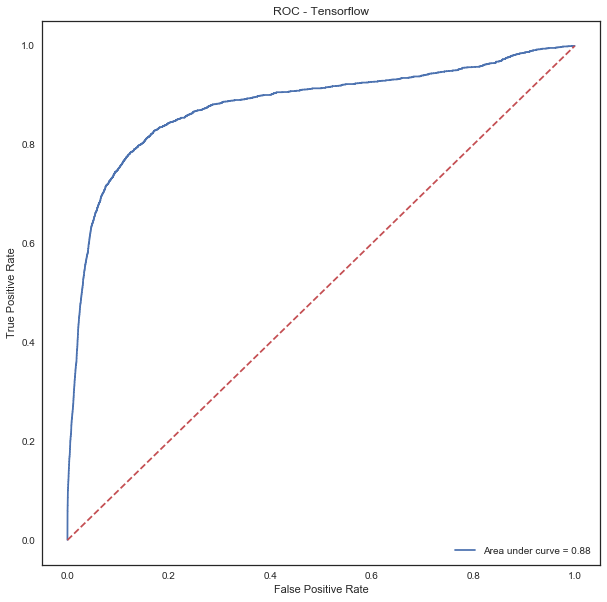

In [483]:
plt.figure(figsize=(10,10))
plt.title('ROC - Tensorflow')
plt.plot(fpr, tpr, 'b',label='Area under curve = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Boosting Algorithm
Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes of the models before them in the sequence.

Once created, the models make predictions which may be weighted by their demonstrated accuracy and the results are combined to create a final output prediction.

The two most common boosting ensemble machine learning algorithms are:

AdaBoost
Stochastic Gradient Boosting

In [487]:
## AdaBoost...
#AdaBoost was perhaps the first successful boosting ensemble algorithm. It generally works by weighting instances in the dataset by how easy or difficult they are to classify, allowing the algorithm to pay or or less attention to them in the construction of subsequent models.

from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
X_train, X_test, y_train, y_test = train_test_split(PropertyCsvDs.drop('Target_Variable_Convert',axis=1), PropertyCsv[['Target_Variable_Convert']], test_size=0.3)
# X_train1, X_test1, y_train1, y_test1 = train_test_split(PropertyCsv, PropertyCsv[['Target_Variable_Convert']], test_size=0.3)

In [488]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\envs\newenvt\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [489]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9306944444444445


In [ ]:
### SVC 
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

## Logistic Regression With Stochastic Gradient Descent
 we can use a technique that evaluates and updates the coefficients every iteration called stochastic gradient descent to minimize the error of a model on our training data.

In [ ]:
from math import exp
 
# Make a prediction with coefficients
def predict(row, coefficients):
	yhat = coefficients[0]
	for i in range(len(row)-1):
		yhat += coefficients[i + 1] * row[i]
	return 1.0 / (1.0 + exp(-yhat))
 
# Estimate logistic regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, n_epoch):
	coef = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			yhat = predict(row, coef)
			error = row[-1] - yhat
			sum_error += error**2
			coef[0] = coef[0] + l_rate * error * yhat * (1.0 - yhat)
			for i in range(len(row)-1):
				coef[i + 1] = coef[i + 1] + l_rate * error * yhat * (1.0 - yhat) * row[i]
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
	return coef

In [ ]:
l_rate = 0.3
n_epoch = 100
coef = coefficients_sgd(X_train, l_rate, n_epoch)
print(coef)

In [ ]:
### Extra tress classifier...